# Installing

In [ ]:
import numpy as np
import pandas as pd
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('ORDER_RECIPE_TOTAL.csv')
df

,ORDER_ID,COMPARTMENT_ID,ORDER_RECIPE_ID,BAY_CODE,API_CODE,INJECTOR_PRESET_CODE,TARE_SCALE_INTERFACE_CODE,TANK_CODE,PRODUCT_GROUP_CODE,INJECTOR_CODE,...,COMPARTMENT_CONTAINER_TYPE,COMPARTMENT_NUMBER,PDXR_LOADING_REF,BLEND_CORRECTION_METHOD,BLEND_CORRECTION_NET_VOLUME,TOTAL_BATCH_BLEND_NET_VOLUME,BLEND_CORRECTION_SOURCE,COMMODITY_GROUP,DERIVATION_STATUS,DERIVED_VALUES_ERROR
0,8320,8342,8343,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
1,8320,8344,8345,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
2,8320,8346,8347,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
3,8320,8348,8349,BAY_300,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
4,8320,8350,8351,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498060,3099018,3099047,3099049,BAY_400,NaN,FIQ_402,NaN,TK-200,ADD,INJ_402,...,1.0,NaN,NaN,0,0,0,0,0,0,NaN
498061,3099018,3099050,3099051,NaN,NaN,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN
498062,3099018,3099050,3099052,NaN,NaN,NaN,NaN,NaN,ADD,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN
498063,3099018,3099053,3099054,NaN,NaN,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN


In [ ]:
fassakh=df.isnull().sum()
print(fassakh[fassakh > 0])

BAY_CODE                           23818
API_CODE                              23
INJECTOR_PRESET_CODE              392913
TARE_SCALE_INTERFACE_CODE         498065
TANK_CODE                          19050
INJECTOR_CODE                     392913
METER_CODE                        128970
SHOST_SI_HOST_PRODUCT_NUMBER      498065
THOST_TI_HOST_PRODUCT_NUMBER      498065
LAST_USER_NAME                    493432
LAST_MODIFIED                     493432
START_TIME                         20804
END_TIME                           20804
HOST_PRODUCT_CODE                 498065
HOST_PRODUCT_NAME                 498065
FINAL_SCALE_INTERFACE_CODE        498065
PETROEX_COMPONENT_PRODUCT_CODE    498065
REDUCED_PRODUCT_NUMBER            498065
VRU_CODE                          498065
PDXR_PRODUCT_CODE                 498065
PDXR_ADDITIVE_CODE                498065
METER_PRESET_CODE                 128970
COMPARTMENT_OWNER_ID               19050
COMPARTMENT_CONTAINER_CODE         19050
COMPARTMENT_CONT

In [ ]:
df1 = df.drop(['COMPARTMENT_ID','PDXR_AUTHORIZATION_UNITS','MEASURED_QUANTITY_TYPE','COMMITTED_CONV_COE','COMMITTED_CONV_PRESSURE',
               'INVENTORY_QUANTITY_TYPE','DERIVED_VALUES_DIRECTIVE','ADJUSTMENT_BATCH','COMMODITY_GROUP','CALCULATE_NET',
               'DERIVATION_STATUS','TOTAL_BATCH_BLEND_NET_VOLUME','PRESSURE','NON_RECIPE_WEIGHT_IN_VAC','BLEND_CORRECTION_METHOD',
               'BLEND_CORRECTION_NET_VOLUME','BLEND_CORRECTION_SOURCE','ORDER_ID','ORDER_RECIPE_ID','API_CODE','HOST_PRODUCT_CODE',
               'PDXR_ADDITIVE_CODE','PDXR_PRODUCT_CODE','REDUCED_PRODUCT_NUMBER','INJECTOR_PRESET_CODE','INJECTOR_CODE','BAY_CODE',
               'HOST_PRODUCT_NAME','PETROEX_COMPONENT_PRODUCT_CODE','FINAL_SCALE_INTERFACE_CODE','TARE_SCALE_INTERFACE_CODE','TANK_CODE',
               'METER_CODE','SHOST_SI_HOST_PRODUCT_NUMBER','THOST_TI_HOST_PRODUCT_NUMBER','LAST_MODIFIED','LAST_USER_NAME','METER_PRESET_CODE',
               'COMPARTMENT_OWNER_ID','COMPARTMENT_CONTAINER_CODE','COMPARTMENT_CONTAINER_TYPE','COMPARTMENT_NUMBER','PDXR_LOADING_REF',
               'DERIVED_VALUES_ERROR','BLEND_PERCENT','VRU_CODE','RT_INJECTOR_ALARM_COUNT','RATE','OVERRIDE_TEMPERATURE_ENABLE',
               'COMMITTED_WEIGHT_IN_AIR','COMMITTED_WEIGHT_IN_VAC','COMPATIBILITY_STATUS','NON_RECIPE_WEIGHT','BLEND_PERCENT',
               'COMMITTED_CONV_DENSITY','ADDITIVE_WEIGHT_IN_VAC','PRODUCT_WEIGHT_IN_VAC','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY',
               'NON_RECIPE_GROSS_QUANTITY','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY','NON_RECIPE_GROSS_QUANTITY','RECIPE_CORRECTION_TYPE',
               'COMPATIBILITY_STATUS','ADDITIVE_MASKING','CUSTOMER_NET_QUANTITY','DENSITY','NET_QUANTITY','WEIGHT','PRODUCT_TOLERANCE_STATUS',
               'SPECIFIC_GRAVITY','COEFFICIENT_EXPANSION','TEMPERATURE','RVP','PRODUCT_TOLERANCE_STATUS','TANK_INVENTORY_UPDATED','TOTALIZER_UPDATED',
               'FLUSH_STATUS','ADDITIVE_WEIGHT','PRODUCT_WEIGHT','BATCH_NUMBER','FRAC_END_GROSS_TOTALIZER','START_GROSS_TOTALIZER','END_GROSS_TOTALIZER',
               'START_NET_TOTALIZER','FROM_LEFT_ON_TRUCK','OBSERVED_DENSITY','COMPONENT_ID','CALCULATE_SECONDARY_UNITS','FRAC_START_GROSS_TOTALIZER',
               'TERMINAL_PRODUCT_TYPE','END_WEIGHT','START_WEIGHT','END_NET_TOTALIZER','OXYGEN','GROSS_QUANTITY','TERMINAL_PRODUCT_NUMBER','COMMITTED_CONV_TEMPERATURE',
               'COMMITTED_GROSS_QUANTITY','COMMITTED_NET_QUANTITY','END_TIME','SUPPLIER_NUMBER','ADDITIVE_QUANTITY','PRODUCT_QUANTITY'], axis=1)

In [ ]:
df1['PRODUCT_GROUP_CODE'].unique()

array(['DSL', 'GAS', 'ADD', 'HFO'], dtype=object)

In [ ]:
# Forward Fill: fill missing dates with the last observed value
df1['START_TIME'] = df1['START_TIME'].fillna(method='ffill')

In [ ]:
# Save the 'START_TIME' column before any manipulation
start_time = df1['START_TIME']

In [ ]:
# Define list of product types
product_types = ['DSL', 'GAS', 'ADD', 'HFO']

# Loop through each product type
for prod in product_types:
    # Filter data for the current product type
    df_filtered = df1[df1['PRODUCT_GROUP_CODE'].str.upper() == prod.upper()]

In [ ]:
print(df1.isnull().any()> 0)

PRODUCT_GROUP_CODE    False
ORDERED_QUANTITY      False
START_TIME             True
dtype: bool


In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1 = df1.dropna(subset=['START_TIME'])
df1

,PRODUCT_GROUP_CODE,ORDERED_QUANTITY,START_TIME
3,DSL,671,2021-09-24
4,DSL,100,2021-09-24
5,DSL,100,2021-09-24
6,DSL,100,2021-09-24
7,DSL,8000,2021-09-24
...,...,...,...
498060,ADD,300,2023-07-20
498061,DSL,2000,2023-07-20
498062,ADD,200,2023-07-20
498063,DSL,6000,2023-07-20


In [ ]:
df1 = df1.drop(['PRODUCT_GROUP_CODE'], axis=1)

In [ ]:
df1 = df1.groupby('START_TIME').sum().reset_index()
df1

,START_TIME,ORDERED_QUANTITY
0,2021-09-24,33971
1,2021-09-27,1894550
2,2021-09-28,5067100
3,2021-09-29,5116000
4,2021-09-30,5796610
...,...,...
653,2023-07-16,451080
654,2023-07-17,11263595
655,2023-07-18,7353450
656,2023-07-19,3543140


In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1.set_index('START_TIME', inplace=True)
"""df1=df1.loc[datetime.date(year=2021,month=12,day=1):]"""

'df1=df1.loc[datetime.date(year=2021,month=12,day=1):]'

In [ ]:
df1

,ORDERED_QUANTITY
START_TIME,
2021-09-24,33971
2021-09-27,1894550
2021-09-28,5067100
2021-09-29,5116000
2021-09-30,5796610
...,...
2023-07-16,451080
2023-07-17,11263595
2023-07-18,7353450


In [ ]:
from sklearn.preprocessing import StandardScaler
# normalize the data_set
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [ ]:
train_size = int(len(df1_scaled) * 0.80)
test_size = len(df1_scaled) - train_size
train_scaled, test_scaled = df1_scaled[0:train_size, :], df1_scaled[train_size:len(df1_scaled), :]

In [ ]:
# convert an array of values into a data_set matrix def
def create_dataset(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [ ]:
# Create X and Y for training and testing
look_back = 8
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)

In [ ]:
# Define and compile the feedforward neural network
model = Sequential([
    Dense(64, input_shape=(look_back,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)
# Now you can use early_stopping in model.fit()
history = model.fit(X_train, Y_train, epochs=120, batch_size=15, validation_data=(X_test, Y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/120
35/35 [==============================] - 3s 29ms/step - loss: 0.6541 - val_loss: 0.9712 - lr: 0.0010
Epoch 2/120
35/35 [==============================] - 0s 7ms/step - loss: 0.3308 - val_loss: 0.8004 - lr: 0.0010
Epoch 3/120
35/35 [==============================] - 0s 9ms/step - loss: 0.2568 - val_loss: 0.7029 - lr: 0.0010
Epoch 4/120
35/35 [==============================] - 0s 12ms/step - loss: 0.2325 - val_loss: 0.6782 - lr: 0.0010
Epoch 5/120
35/35 [==============================] - 1s 26ms/step - loss: 0.2163 - val_loss: 0.6696 - lr: 0.0010
Epoch 6/120
35/35 [==============================] - 0s 6ms/step - loss: 0.2098 - val_loss: 0.6843 - lr: 0.0010
Epoch 7/120
35/35 [==============================] - 0s 7ms/step - loss: 0.2022 - val_loss: 0.6518 - lr: 0.0010
Epoch 8/120
35/35 [==============================] - 0s 8ms/step - loss: 0.1937 - val_loss: 0.6523 - lr: 0.0010
Epoch 9/120
35/35 [==============================] - 0s 7ms/step - loss: 0.1872 - val_loss: 0.6449 - 

In [ ]:
# Save the trained model
model.save('trained_model.h5')

In [ ]:
# Predict on train and test sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([Y_test])

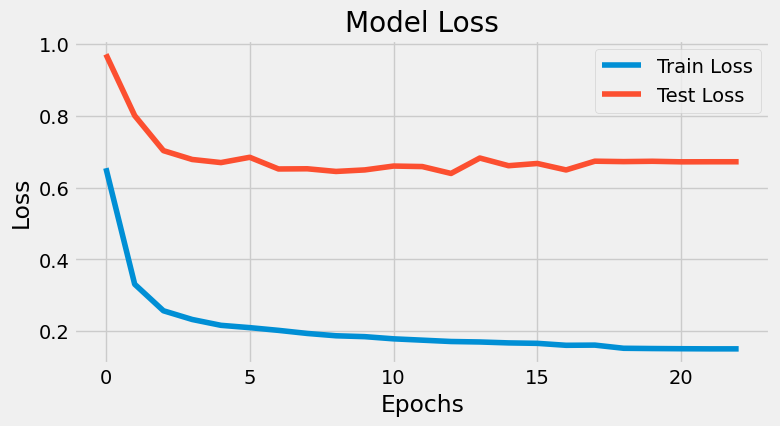

In [ ]:
# Plot loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

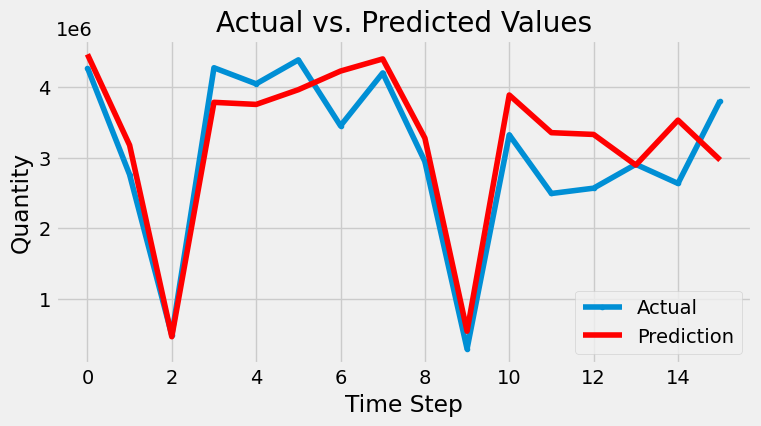

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8,4))
plt.plot(Y_test_inv[0][:16], marker='.', label="Actual")
plt.plot(test_predict[:,0][:16], 'r', label="Prediction")
plt.title('Actual vs. Predicted Values')
plt.ylabel('Quantity')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
"""from keras.models import load_model
input_date = '2024-05-08'  # Example input date
input_date = pd.to_datetime(input_date).date()

# Use the trained model to make predictions
loaded_model = load_model('trained_model.h5')
input_data = df1[start_time == input_date]
input_data_scaled = scaler.transform(input_data)  # Assuming 'scaler' was defined earlier

# Reshape input data to match model's input shape
X_input, _ = create_dataset(input_data_scaled, look_back)
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1]))

# Make predictions for the input data
predicted_quantity = loaded_model.predict(X_input)

# Postprocess predictions (e.g., inverse scaling)
predicted_quantity = scaler.inverse_transform(predicted_quantity)

print("Predicted quantity demanded for", input_date, ":", predicted_quantity)"""

'from keras.models import load_model\ninput_date = \'2024-05-08\'  # Example input date\ninput_date = pd.to_datetime(input_date).date()\n\n# Use the trained model to make predictions\nloaded_model = load_model(\'trained_model.h5\')\ninput_data = df1[start_time == input_date]\ninput_data_scaled = scaler.transform(input_data)  # Assuming \'scaler\' was defined earlier\n\n# Reshape input data to match model\'s input shape\nX_input, _ = create_dataset(input_data_scaled, look_back)\nX_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1]))\n\n# Make predictions for the input data\npredicted_quantity = loaded_model.predict(X_input)\n\n# Postprocess predictions (e.g., inverse scaling)\npredicted_quantity = scaler.inverse_transform(predicted_quantity)\n\nprint("Predicted quantity demanded for", input_date, ":", predicted_quantity)'

In [ ]:
def predict_for_date(input_date, model, scaler, df, look_back=8):
    # Convert input_date to datetime object if it's a string
    if isinstance(input_date, str):
        input_date = pd.to_datetime(input_date).date()

    # Find the start index for the look_back period
    start_date = input_date - datetime.timedelta(days=look_back)

    # Filter the DataFrame to get the look_back period data
    mask = (df['START_TIME'] >= start_date) & (df['START_TIME'] < input_date)
    period_data = df.loc[mask]

    # Check if we have enough data to make a prediction
    if len(period_data) < look_back:
        raise ValueError("Not enough historical data to make a prediction for this date.")

    # Prepare the data for prediction
    period_data = period_data.set_index('START_TIME')
    period_data = scaler.transform(period_data)  # Ensure the scaler is fitted to the training data

    # Reshape data for model input
    period_data = period_data.reshape(1, look_back, -1)  # Assuming the model is LSTM

    # Make prediction
    prediction = model.predict(period_data)
    prediction = scaler.inverse_transform(prediction)  # Inverse scaling

    return prediction[0][0]

# Example usage:
input_date = '2024-06-01'
predicted_quantity = predict_for_date(input_date, model, scaler, df1, look_back=8)
print(f"Predicted Quantity for {input_date}: {predicted_quantity}")


KeyError: 'START_TIME'